# El método de K-Means

- Definimos la distancia intra-cluster para un cluster $C_j$ cualquiuera como:
$$SS_w (C_j) = \sum_{x \in C_j} (x-c_j)^2$$
- También podemos usar la distancia intracluster normalizada para validar la eficacia del modelo
$$S\tilde{S}_w = \sum_{j=1}^n \frac{SS_w (C_j) }{SST}$$
**<center>donde**
$$SS_T = \sum_{i=1}^n (x_i-\bar{x})^2$$

- El objetivo de k-means es obtener una configuración de centroides del cluster de modo que la suma de cuadradados siguientes(SSw) sea mínima.

$$SS_W(k) = \sum_{j=1}^k SS_W(C_j) = \sum_{j=1}^k\sum_{x_i \in C_j} (x_i-c_j)^2$$

- Donde k es el número de clusters.
- $x_i$ son los puntos que pertenecen al cluster j-ésimo.
- $c_j$ el centroide del cluster j-ésimo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 
style.use("ggplot")

In [2]:
data = np.random.random(90).reshape(30,3)
data[:10]

array([[1.19410920e-01, 1.59606201e-02, 1.27903393e-01],
       [3.66969299e-01, 5.84836415e-01, 9.48671808e-01],
       [1.93394669e-01, 6.85368844e-04, 8.40789561e-02],
       [4.53901277e-02, 2.67329278e-01, 5.99246892e-01],
       [3.81032237e-01, 8.14860921e-01, 2.32750528e-01],
       [4.56771867e-01, 4.90572251e-01, 3.53361546e-01],
       [6.04031967e-01, 1.19573053e-01, 6.55377465e-01],
       [4.82617064e-01, 9.90977260e-01, 3.82743692e-01],
       [3.70633050e-01, 9.92296993e-01, 1.47946839e-01],
       [7.32414005e-01, 6.17387163e-01, 8.10671776e-01]])

In [3]:
c1 = np.random.choice(range(len(data)))
# Defino los baricentros para después separarlos 
c1

28

In [4]:
c2 = np.random.choice(len(data))
c2 

6

In [5]:
# np.vstack # Stack arrays in sequence vertically (row wise).

In [6]:
clust_centers = np.vstack([data[c1],data[c2]])
clust_centers

array([[0.65149615, 0.76313473, 0.54049253],
       [0.60403197, 0.11957305, 0.65537747]])

In [7]:
data[c1]

array([0.65149615, 0.76313473, 0.54049253])

In [8]:
data[c2]

array([0.60403197, 0.11957305, 0.65537747])

In [9]:
from scipy.cluster.vq import vq

In [10]:
# Assigns a code from a code book to each observation. Each
# observation vector in the 'M' by 'N' `obs` array is compared with the
# centroids in the code book and assigned the code of the closest
# centroid.
vq(data,clust_centers)[0]

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0])

In [11]:
len(data)

30

In [12]:
vq(data,clust_centers)[1]

array([0.72375548, 0.52854153, 0.71353995, 0.58057148, 0.41295455,
       0.38370022, 0.        , 0.32452589, 0.53431408, 0.3174695 ,
       0.46099692, 0.64744453, 0.61833533, 0.744258  , 0.76721418,
       0.55516971, 0.10381498, 0.6280008 , 0.3315189 , 0.68631872,
       0.36158985, 0.35500983, 0.43460866, 0.27809336, 0.19414572,
       0.48667357, 0.30760985, 0.53531107, 0.        , 0.46668645])

In [13]:
# Primer observación menos centroide
np.sqrt((0.61084686-0.43121689)**2+(0.02648995-0.03582013)**2+ ( 0.18787792-0.18365703)**2)

0.17992163375599218

In [14]:
from scipy.cluster.vq import kmeans

In [15]:
kmeans(data,clust_centers)
# El numero final es la suma de la distancia de los errores ya normalizazdo. 
# Aquí le dimos nosotros los baricentros.

(array([[0.44960719, 0.71644688, 0.45403403],
        [0.35288819, 0.1548273 , 0.34686014]]), 0.36175594498061314)

In [16]:
from mpl_toolkits import mplot3d

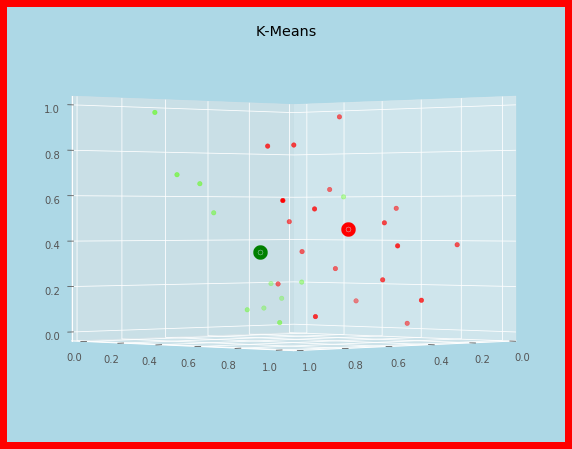

In [17]:
plt.figure(figsize=(10,8),facecolor="red",)                    
ax = plt.subplot(projection="3d",fc = "lightblue",frame_on=True)
ax.scatter3D(data[:,0],data[:,1],data[:,2],c=vq(data,clust_centers)[0],cmap="prism" )
ax.scatter3D(kmeans(data,clust_centers)[0][0][0],kmeans(data,clust_centers)[0][0][1],kmeans(data,clust_centers)[0][0][2],
            marker = "o",color="red",linewidth=10)
ax.scatter3D(kmeans(data,clust_centers)[0][1][0],kmeans(data,clust_centers)[0][1][1],kmeans(data,clust_centers)[0][1][2],
            marker = "o",color="green",linewidth=10)
ax.set_title("K-Means")
ax.view_init(elev=0, azim=45)
plt.show()

In [18]:
kmeans_verdaderos = kmeans(data,2,iter=1000)#No le específicamos el baricentro. Solo le damos el número de clusters y 
# si nos damos cuenta el error baja. Trata de optimizar la suma de los errores al cuadrádo.
kmeans_verdaderos

(array([[0.50698444, 0.6234741 , 0.52680689],
        [0.23619676, 0.213304  , 0.2016754 ]]), 0.3554043313633424)

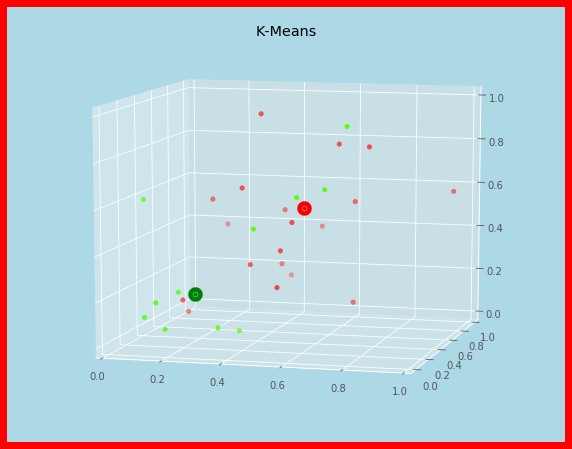

In [19]:
plt.figure(figsize=(10,8),facecolor="red",)                    
ax = plt.subplot(projection="3d",fc = "lightblue",frame_on=True)
ax.scatter3D(data[:,0],data[:,1],data[:,2],c=vq(data,clust_centers)[0],cmap="prism" )
ax.scatter3D(kmeans_verdaderos[0][0][0],kmeans_verdaderos[0][0][1],kmeans_verdaderos[0][0][2],
            marker = "o",color="red",linewidth=10)
ax.scatter3D(kmeans_verdaderos[0][1][0],kmeans_verdaderos[0][1][1],kmeans_verdaderos[0][1][2],
            marker = "o",color="green",linewidth=10)
ax.set_title("K-Means")
ax.view_init(elev=10, azim=285)
plt.show()